In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from rdrobust import rdrobust,rdbwselect,rdplot

In [2]:
threshold = 10000
sample_size= 1000

In [3]:
def truncate(a):
    return max(-a, a)

# create simulate data(SRDD)

In [4]:
np.random.seed(77)

a =np.random.normal( loc   = threshold,  scale = 3500, size  = sample_size)
a = a + np.random.randint(-2000,2000,sample_size)
a = np.where(a > 0, a, -a)
a = [10000 + truncate(np.random.normal( loc   = 0,  scale = 500)) if (a[i] > 9000) & (a[i] < 10000) & (i % 3 == 0) else a[i]  for i in range(len(a))]

a = np.array(a).astype(float)
user_last_month_spend= np.array(a).astype(int)

In [6]:
np.random.seed(77)

def upper_threshold(num, c):
    x = (num - c) / 20000
    return 1.8 + 0.5 * x  -  0.5* x**2 +  0.3* x**4

def lower_threshold(num, c):
    x = (c - num) / 10000
    return  1.5 -  0.3 * x -   0.5 * x**2

b =  [10000 * upper_threshold(a[i], threshold) if (a[i] >threshold) else 10000 * lower_threshold(a[i], threshold)   for i in range(len(a))]
b = b  + np.random.normal( loc   = 0,  scale = 2000, size  = sample_size) + np.random.randint(-3000,3000,sample_size)
b = np.where(b > 0, b, 0.01 * -b)

user_this_month_spend= np.array(b).astype(int)

In [8]:
np.random.seed(77)
probability = 0.33

c = np.random.choice([1, 0], size=sample_size, p=[probability, 1-probability])
d = np.random.randint(20,80,sample_size)

sex = np.array(c).astype(int)
age = np.array(d).astype(int)

In [9]:
cols = ['last_month_spend' , 'this_month_spend']
df = pd.DataFrame(index=[], columns=cols)
df['last_month_spend'] = user_last_month_spend
df['this_month_spend'] = user_this_month_spend
df['sex'] = sex
df['age'] = age
df["treatment"]  = df['last_month_spend'].apply(lambda x : 1 if x >= 10000 else 0)

,last_month_spend,this_month_spend,sex,age,treatment
0,11900,17185,0,78,1
1,11621,22057,0,67,1
2,7236,10703,0,31,0
3,10501,17589,1,47,1
4,11284,17804,1,59,1


<AxesSubplot:xlabel='last_month_spend', ylabel='this_month_spend'>

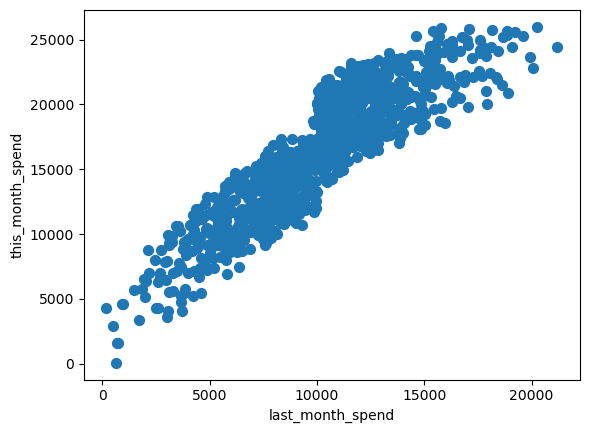

In [10]:
display(df.head())
df.plot.scatter(x='last_month_spend', y='this_month_spend', s=50)

In [11]:
df.to_csv("../data/ch5_coupon.csv", index = False)

# create simulate data(FRDD)

In [9]:
np.random.seed(77)

a =np.random.normal( loc   = threshold,  scale = 3500, size  = sample_size)
a = a + np.random.randint(-2000,2000,sample_size)
a = np.where(a > 0, a, -a)

a = np.array(a).astype(float)
user_last_month_spend= np.array(a).astype(int)

prob = np.where(a < 10000, a/10000 * 0 , 0) + np.where(a > 10000, 0.5 + (a - 10000) / (a.max() - 10000) * 0.3, 0)
treatment = [np.random.binomial(1, p) for p in prob]

In [10]:
np.random.seed(77)

def upper_threshold(num, c):
    x = (num - c) / 20000
    return (1.8 + 0.5 * x  -  0.5* x**2 +  0.3* x**4) * 10000

def lower_threshold(num, c):
    x = (c - num) / 10000
    return  (1.5 -  0.3 * x -   0.5 * x**2) * 10000

b =  [(upper_threshold(x, 10000)) if y == 1 else lower_threshold(x, 10000) for x , y in zip(a, treatment)]
b = b  + np.random.normal( loc   = 0,  scale = 2000, size  = sample_size) + np.random.randint(-10000,10000,sample_size)
b = np.where(b > 0, b, 0.01 * -b)

user_this_month_spend= np.array(b).astype(int)

In [11]:
cols = ['last_month_spend' , 'this_month_spend']
df = pd.DataFrame(index=[], columns=cols)
df['last_month_spend'] = user_last_month_spend
df['this_month_spend'] = user_this_month_spend
df['treatment'] = treatment

,last_month_spend,this_month_spend,treatment
0,11900,21241,0
1,11621,23249,1
2,7236,12473,0
3,10501,18700,1
4,11284,9825,1


<AxesSubplot:xlabel='last_month_spend', ylabel='this_month_spend'>

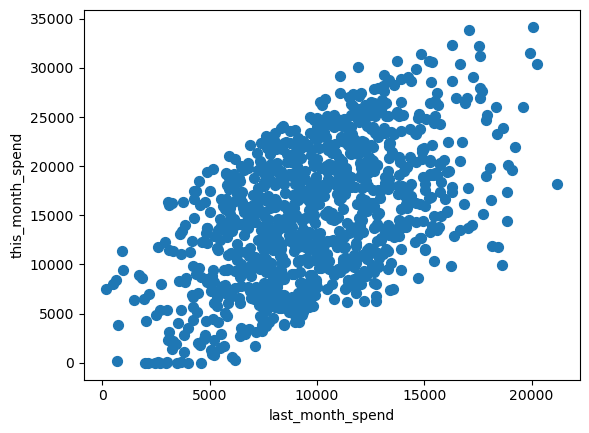

In [12]:
display(df.head())
df.plot.scatter(x='last_month_spend', y='this_month_spend', s=50)

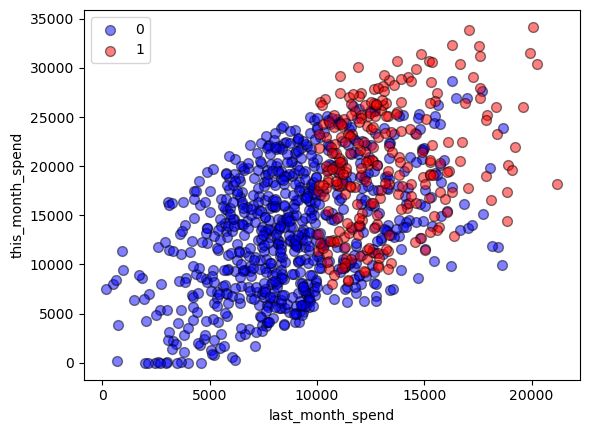

In [13]:
# ラベルごとにデータを分ける
df_label0 = df[df['treatment'] == 0]
df_label1 = df[df['treatment'] == 1]

# 散布図の作成
fig, ax = plt.subplots()

ax.scatter(df_label0['last_month_spend'], df_label0['this_month_spend'], c='blue', label='0', edgecolors='k', s=50, alpha=0.5)
ax.scatter(df_label1['last_month_spend'], df_label1['this_month_spend'], c='red', label='1', edgecolors='k', s=50, alpha=0.5)

# 軸ラベルと凡例の追加
ax.set_xlabel('last_month_spend')
ax.set_ylabel('this_month_spend')
ax.legend()

# グラフの表示
plt.show()

In [14]:
df.to_csv("../data/ch5_coupon_v2.csv", index = False)